In [1]:
from copy import deepcopy
from scipy.spatial import distance 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']= (16,9)
plt.style.use('ggplot')


In [2]:
#importing daata set
data= pd.read_csv('Data dummy.csv')
print(data.shape)
data

(23, 6)


,Nama Produk,Jumlah Stok,Stok Keluar,Keuntungan,Harga Beli,Harga Jual
0,Habbatussauda Extra Propolis Trigon,109,41,118.181818,55000,120000
1,Habbatussauda Oil 200 Kapsul,99,16,122.222222,45000,100000
2,Habasyi Oil 100 Kps,85,16,100.000000,24000,48000
3,Habasyi Oil 210 Kps,81,18,100.000000,45000,90000
4,Kapsul Habbatus Sauda,81,30,140.000000,10000,24000
5,Habat Oil 369,83,49,133.333333,15000,35000
6,Habbatussauda Al-Afiat 100 Kps,113,32,75.000000,20000,35000
7,Habbatussauda Al-Afiat 200 Kps,110,20,100.000000,25000,50000
8,Habbatussauda Oil Al-Afiat 100 Kps,106,38,100.000000,30000,60000
9,Habbatussauda Oil Al-Afiat 200 Kps,99,42,120.000000,50000,110000


In [3]:
f1= data['Jumlah Stok'].values
f2= data['Stok Keluar'].values
f3= data['Keuntungan'].values
f4= data['Harga Beli'].values
f5= data['Harga Jual'].values
f6= data['Nama Produk'].values
X = np.array(list(zip(f1,f2,f3)))
print(data['Nama Produk'].values)

['Habbatussauda Extra Propolis Trigon' 'Habbatussauda Oil 200 Kapsul'
 'Habasyi Oil 100 Kps' 'Habasyi Oil 210 Kps' 'Kapsul Habbatus Sauda'
 'Habat Oil 369' 'Habbatussauda Al-Afiat 100 Kps'
 'Habbatussauda Al-Afiat 200 Kps' 'Habbatussauda Oil Al-Afiat 100 Kps'
 'Habbatussauda Oil Al-Afiat 200 Kps' 'Habbatussauda Oil Al-Afiat 60 Kps'
 'Propolis Brazalian / Botol' 'Propolis Diamond Lite 20 / Botol'
 'Propolis Diamond Regular / Botol' 'Propolis Melia Nature / Botol'
 'Propolis Melia Sehat / Botol' 'Propolis Prosmart/ Botol'
 'Madu Al-Kautsar' 'Madu Batuk Al-Wadey' 'Madu for Mama Al Mabruroh'
 'Madu Hitam Pahit 460 gram' 'Madu Hutan Liar Al Wadey 500 Gram'
 'Madu Hutan Sialang 1 Kg']


In [4]:
#Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a-b,axis=ax)def dist(a, b, ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [5]:
k=3
C_w = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size=k)
C_x = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size=k)
C_y = np.random.randint(np.min(X[:,2]), np.max(X[:,2]), size=k)
C= np.array(list(zip(C_w,C_x,C_y)), dtype=np.float32)
C

array([[114.,  46.,  79.],
       [ 87.,  49., 126.],
       [112.,  20.,  83.]], dtype=float32)

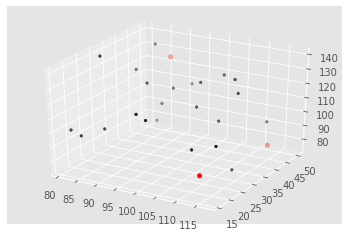

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1,f2,f3, c='black', s=7)
ax.scatter(C[:,0],C[:,1],C[:,2], c='red', s=20)

In [7]:
C_old=np.zeros((C.shape))
#label
clusters = np.zeros(len(X))
error = dist(C,C_old)
counter=1
print(X)
while counter <100:
    print("C")
    print(C)
    for i in range(len(X)):
        distance=dist(X[i],C)
        print("dist")
        print(distance)
        cluster = np.argmin(distance)
        print("cluster")
        print(cluster)
        clusters[i] = cluster
    #storing old centroid
    C_old=deepcopy(C)
    #finding the new centroid
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        print("points")
        print(points)
        C[i]=np.mean(points,axis=0)
        print(C[i])
    error = dist(C,C_old)
    counter+=1

[[109.          41.         118.18181818]
 [ 99.          16.         122.22222222]
 [ 85.          16.         100.        ]
 [ 81.          18.         100.        ]
 [ 81.          30.         140.        ]
 [ 83.          49.         133.33333333]
 [113.          32.          75.        ]
 [110.          20.         100.        ]
 [106.          38.         100.        ]
 [ 99.          42.         120.        ]
 [ 89.          42.         100.        ]
 [ 92.          50.         108.33333333]
 [ 89.          36.         120.        ]
 [101.          37.         108.33333333]
 [102.          47.         122.22222222]
 [ 87.          22.         100.        ]
 [ 83.          41.         122.22222222]
 [107.          43.         125.        ]
 [ 87.          43.          85.71428571]
 [100.          18.         116.66666667]
 [ 92.          42.         112.5       ]
 [112.          49.          92.        ]
 [117.          18.         108.33333333]]
C
[[114.  46.  79.]
 [ 87.  49. 1

[101.4       40.8       90.542854]
points
[array([109.        ,  41.        , 118.18181818]), array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([ 89.,  36., 120.]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([ 83.        ,  41.        , 122.22222222]), array([107.,  43., 125.]), array([ 92. ,  42. , 112.5])]
[ 94.36364   41.636364 120.92057 ]
points
[array([ 99.        ,  16.        , 122.22222222]), array([ 85.,  16., 100.]), array([ 81.,  18., 100.]), array([110.,  20., 100.]), array([ 87.,  22., 100.]), array([100.        ,  18.        , 116.66666667]), array([117.        ,  18.        , 108.33333333])]
[ 97.        18.285715 106.74603 ]
C
[[101.4       40.8       90.542854]
 [ 94.36364   41.636364 120.92057 ]
 [ 97.        18.285715 106.74603 ]]
dist
[28.66552461 14.90398476 28.11967154]
cluster
1
dist
[40.3

dist
[15.34650195 35.99396025 33.95777172]
cluster
0
dist
[34.70235643 24.66864315 10.36825015]
cluster
2
dist
[23.91477111  8.7535724  24.90934459]
cluster
1
dist
[13.48047676 34.66502165 37.22650638]
cluster
0
dist
[32.85880493 35.06452681 20.06492353]
cluster
2
points
[array([113.,  32.,  75.]), array([106.,  38., 100.]), array([ 89.,  42., 100.]), array([87.        , 43.        , 85.71428571]), array([112.,  49.,  92.])]
[101.4       40.8       90.542854]
points
[array([109.        ,  41.        , 118.18181818]), array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([ 89.,  36., 120.]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([ 83.        ,  41.        , 122.22222222]), array([107.,  43., 125.]), array([ 92. ,  42. , 112.5])]
[ 94.36364   41.636364 120.92057 ]
points
[array([ 99.        ,  16.        , 122.22

cluster
1
dist
[34.97849161 13.34836498 32.31103836]
cluster
1
dist
[15.34650195 35.99396025 33.95777172]
cluster
0
dist
[34.70235643 24.66864315 10.36825015]
cluster
2
dist
[23.91477111  8.7535724  24.90934459]
cluster
1
dist
[13.48047676 34.66502165 37.22650638]
cluster
0
dist
[32.85880493 35.06452681 20.06492353]
cluster
2
points
[array([113.,  32.,  75.]), array([106.,  38., 100.]), array([ 89.,  42., 100.]), array([87.        , 43.        , 85.71428571]), array([112.,  49.,  92.])]
[101.4       40.8       90.542854]
points
[array([109.        ,  41.        , 118.18181818]), array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([ 89.,  36., 120.]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([ 83.        ,  41.        , 122.22222222]), array([107.,  43., 125.]), array([ 92. ,  42. , 112.5])]
[ 94.36364   41.63636

[ 97.        18.285715 106.74603 ]
C
[[101.4       40.8       90.542854]
 [ 94.36364   41.636364 120.92057 ]
 [ 97.        18.285715 106.74603 ]]
dist
[28.66552461 14.90398476 28.11967154]
cluster
1
dist
[40.30362665 26.08473292 15.77139611]
cluster
2
dist
[31.19996181 34.38853259 13.95469279]
cluster
2
dist
[32.02245512 34.27732248 17.36636377]
cluster
2
dist
[54.57846925 26.03874942 38.71757754]
cluster
1
dist
[47.29508604 18.36932579 42.9680329 ]
cluster
1
dist
[21.29742405 50.48635672 38.10370328]
cluster
0
dist
[24.4138802  33.91604739 14.74610898]
cluster
2
dist
[10.8829034  24.21359713 22.69718014]
cluster
0
dist
[29.57910481  4.74083501 27.24031859]
cluster
1
dist
[15.64089653 21.60025759 25.9205761 ]
cluster
0
dist
[22.12467371 15.29626546 32.14522344]
cluster
1
dist
[32.31908821  7.83483765 23.52580579]
cluster
1
dist
[18.19618475 14.96581717 19.20270769]
cluster
1
dist
[32.28594677  9.42214867 33.0003424 ]
cluster
1
dist
[25.49975725 29.62229307 12.62160329]
cluster
2
dist
[

dist
[47.29508604 18.36932579 42.9680329 ]
cluster
1
dist
[21.29742405 50.48635672 38.10370328]
cluster
0
dist
[24.4138802  33.91604739 14.74610898]
cluster
2
dist
[10.8829034  24.21359713 22.69718014]
cluster
0
dist
[29.57910481  4.74083501 27.24031859]
cluster
1
dist
[15.64089653 21.60025759 25.9205761 ]
cluster
0
dist
[22.12467371 15.29626546 32.14522344]
cluster
1
dist
[32.31908821  7.83483765 23.52580579]
cluster
1
dist
[18.19618475 14.96581717 19.20270769]
cluster
1
dist
[32.28594677  9.42214867 33.0003424 ]
cluster
1
dist
[25.49975725 29.62229307 12.62160329]
cluster
2
dist
[36.63580773 11.45563472 30.84560228]
cluster
1
dist
[34.97849161 13.34836498 32.31103836]
cluster
1
dist
[15.34650195 35.99396025 33.95777172]
cluster
0
dist
[34.70235643 24.66864315 10.36825015]
cluster
2
dist
[23.91477111  8.7535724  24.90934459]
cluster
1
dist
[13.48047676 34.66502165 37.22650638]
cluster
0
dist
[32.85880493 35.06452681 20.06492353]
cluster
2
points
[array([113.,  32.,  75.]), array([106.

[101.4       40.8       90.542854]
points
[array([109.        ,  41.        , 118.18181818]), array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([ 89.,  36., 120.]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([ 83.        ,  41.        , 122.22222222]), array([107.,  43., 125.]), array([ 92. ,  42. , 112.5])]
[ 94.36364   41.636364 120.92057 ]
points
[array([ 99.        ,  16.        , 122.22222222]), array([ 85.,  16., 100.]), array([ 81.,  18., 100.]), array([110.,  20., 100.]), array([ 87.,  22., 100.]), array([100.        ,  18.        , 116.66666667]), array([117.        ,  18.        , 108.33333333])]
[ 97.        18.285715 106.74603 ]
C
[[101.4       40.8       90.542854]
 [ 94.36364   41.636364 120.92057 ]
 [ 97.        18.285715 106.74603 ]]
dist
[28.66552461 14.90398476 28.11967154]
cluster
1
dist
[40.3

[34.70235643 24.66864315 10.36825015]
cluster
2
dist
[23.91477111  8.7535724  24.90934459]
cluster
1
dist
[13.48047676 34.66502165 37.22650638]
cluster
0
dist
[32.85880493 35.06452681 20.06492353]
cluster
2
points
[array([113.,  32.,  75.]), array([106.,  38., 100.]), array([ 89.,  42., 100.]), array([87.        , 43.        , 85.71428571]), array([112.,  49.,  92.])]
[101.4       40.8       90.542854]
points
[array([109.        ,  41.        , 118.18181818]), array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([ 89.,  36., 120.]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([ 83.        ,  41.        , 122.22222222]), array([107.,  43., 125.]), array([ 92. ,  42. , 112.5])]
[ 94.36364   41.636364 120.92057 ]
points
[array([ 99.        ,  16.        , 122.22222222]), array([ 85.,  16., 100.]), array([ 81.,  18., 10

[array([ 99.        ,  16.        , 122.22222222]), array([ 85.,  16., 100.]), array([ 81.,  18., 100.]), array([110.,  20., 100.]), array([ 87.,  22., 100.]), array([100.        ,  18.        , 116.66666667]), array([117.        ,  18.        , 108.33333333])]
[ 97.        18.285715 106.74603 ]
C
[[101.4       40.8       90.542854]
 [ 94.36364   41.636364 120.92057 ]
 [ 97.        18.285715 106.74603 ]]
dist
[28.66552461 14.90398476 28.11967154]
cluster
1
dist
[40.30362665 26.08473292 15.77139611]
cluster
2
dist
[31.19996181 34.38853259 13.95469279]
cluster
2
dist
[32.02245512 34.27732248 17.36636377]
cluster
2
dist
[54.57846925 26.03874942 38.71757754]
cluster
1
dist
[47.29508604 18.36932579 42.9680329 ]
cluster
1
dist
[21.29742405 50.48635672 38.10370328]
cluster
0
dist
[24.4138802  33.91604739 14.74610898]
cluster
2
dist
[10.8829034  24.21359713 22.69718014]
cluster
0
dist
[29.57910481  4.74083501 27.24031859]
cluster
1
dist
[15.64089653 21.60025759 25.9205761 ]
cluster
0
dist
[22.

[ 94.36364   41.636364 120.92057 ]
points
[array([ 99.        ,  16.        , 122.22222222]), array([ 85.,  16., 100.]), array([ 81.,  18., 100.]), array([110.,  20., 100.]), array([ 87.,  22., 100.]), array([100.        ,  18.        , 116.66666667]), array([117.        ,  18.        , 108.33333333])]
[ 97.        18.285715 106.74603 ]
C
[[101.4       40.8       90.542854]
 [ 94.36364   41.636364 120.92057 ]
 [ 97.        18.285715 106.74603 ]]
dist
[28.66552461 14.90398476 28.11967154]
cluster
1
dist
[40.30362665 26.08473292 15.77139611]
cluster
2
dist
[31.19996181 34.38853259 13.95469279]
cluster
2
dist
[32.02245512 34.27732248 17.36636377]
cluster
2
dist
[54.57846925 26.03874942 38.71757754]
cluster
1
dist
[47.29508604 18.36932579 42.9680329 ]
cluster
1
dist
[21.29742405 50.48635672 38.10370328]
cluster
0
dist
[24.4138802  33.91604739 14.74610898]
cluster
2
dist
[10.8829034  24.21359713 22.69718014]
cluster
0
dist
[29.57910481  4.74083501 27.24031859]
cluster
1
dist
[15.64089653 21

[28.66552461 14.90398476 28.11967154]
cluster
1
dist
[40.30362665 26.08473292 15.77139611]
cluster
2
dist
[31.19996181 34.38853259 13.95469279]
cluster
2
dist
[32.02245512 34.27732248 17.36636377]
cluster
2
dist
[54.57846925 26.03874942 38.71757754]
cluster
1
dist
[47.29508604 18.36932579 42.9680329 ]
cluster
1
dist
[21.29742405 50.48635672 38.10370328]
cluster
0
dist
[24.4138802  33.91604739 14.74610898]
cluster
2
dist
[10.8829034  24.21359713 22.69718014]
cluster
0
dist
[29.57910481  4.74083501 27.24031859]
cluster
1
dist
[15.64089653 21.60025759 25.9205761 ]
cluster
0
dist
[22.12467371 15.29626546 32.14522344]
cluster
1
dist
[32.31908821  7.83483765 23.52580579]
cluster
1
dist
[18.19618475 14.96581717 19.20270769]
cluster
1
dist
[32.28594677  9.42214867 33.0003424 ]
cluster
1
dist
[25.49975725 29.62229307 12.62160329]
cluster
2
dist
[36.63580773 11.45563472 30.84560228]
cluster
1
dist
[34.97849161 13.34836498 32.31103836]
cluster
1
dist
[15.34650195 35.99396025 33.95777172]
cluster


[15.34650195 35.99396025 33.95777172]
cluster
0
dist
[34.70235643 24.66864315 10.36825015]
cluster
2
dist
[23.91477111  8.7535724  24.90934459]
cluster
1
dist
[13.48047676 34.66502165 37.22650638]
cluster
0
dist
[32.85880493 35.06452681 20.06492353]
cluster
2
points
[array([113.,  32.,  75.]), array([106.,  38., 100.]), array([ 89.,  42., 100.]), array([87.        , 43.        , 85.71428571]), array([112.,  49.,  92.])]
[101.4       40.8       90.542854]
points
[array([109.        ,  41.        , 118.18181818]), array([ 81.,  30., 140.]), array([ 83.        ,  49.        , 133.33333333]), array([ 99.,  42., 120.]), array([ 92.        ,  50.        , 108.33333333]), array([ 89.,  36., 120.]), array([101.        ,  37.        , 108.33333333]), array([102.        ,  47.        , 122.22222222]), array([ 83.        ,  41.        , 122.22222222]), array([107.,  43., 125.]), array([ 92. ,  42. , 112.5])]
[ 94.36364   41.636364 120.92057 ]
points
[array([ 99.        ,  16.        , 122.2222222

[ 97.        18.285715 106.74603 ]
C
[[101.4       40.8       90.542854]
 [ 94.36364   41.636364 120.92057 ]
 [ 97.        18.285715 106.74603 ]]
dist
[28.66552461 14.90398476 28.11967154]
cluster
1
dist
[40.30362665 26.08473292 15.77139611]
cluster
2
dist
[31.19996181 34.38853259 13.95469279]
cluster
2
dist
[32.02245512 34.27732248 17.36636377]
cluster
2
dist
[54.57846925 26.03874942 38.71757754]
cluster
1
dist
[47.29508604 18.36932579 42.9680329 ]
cluster
1
dist
[21.29742405 50.48635672 38.10370328]
cluster
0
dist
[24.4138802  33.91604739 14.74610898]
cluster
2
dist
[10.8829034  24.21359713 22.69718014]
cluster
0
dist
[29.57910481  4.74083501 27.24031859]
cluster
1
dist
[15.64089653 21.60025759 25.9205761 ]
cluster
0
dist
[22.12467371 15.29626546 32.14522344]
cluster
1
dist
[32.31908821  7.83483765 23.52580579]
cluster
1
dist
[18.19618475 14.96581717 19.20270769]
cluster
1
dist
[32.28594677  9.42214867 33.0003424 ]
cluster
1
dist
[25.49975725 29.62229307 12.62160329]
cluster
2
dist
[

In [8]:
print(clusters)
C

[1. 2. 2. 2. 1. 1. 0. 2. 0. 1. 0. 1. 1. 1. 1. 2. 1. 1. 0. 2. 1. 0. 2.]


array([[101.4     ,  40.8     ,  90.542854],
       [ 94.36364 ,  41.636364, 120.92057 ],
       [ 97.      ,  18.285715, 106.74603 ]], dtype=float32)

In [9]:
produk = data['Nama Produk']
new_data= np.array(list(zip(produk,clusters)))
produk[3:]

3                    Habasyi Oil 210 Kps
4                  Kapsul Habbatus Sauda
5                          Habat Oil 369
6         Habbatussauda Al-Afiat 100 Kps
7         Habbatussauda Al-Afiat 200 Kps
8     Habbatussauda Oil Al-Afiat 100 Kps
9     Habbatussauda Oil Al-Afiat 200 Kps
10     Habbatussauda Oil Al-Afiat 60 Kps
11            Propolis Brazalian / Botol
12      Propolis Diamond Lite 20 / Botol
13      Propolis Diamond Regular / Botol
14         Propolis Melia Nature / Botol
15          Propolis Melia Sehat / Botol
16              Propolis Prosmart/ Botol
17                       Madu Al-Kautsar
18                   Madu Batuk Al-Wadey
19             Madu for Mama Al Mabruroh
20             Madu Hitam Pahit 460 gram
21     Madu Hutan Liar Al Wadey 500 Gram
22               Madu Hutan Sialang 1 Kg
Name: Nama Produk, dtype: object

[37.37870758250608]
[37.37870758250608, 53.75612506120845]
[37.37870758250608, 53.75612506120845, 20.276382746294846]


Text(0.5, 0, 'Keuntungan')

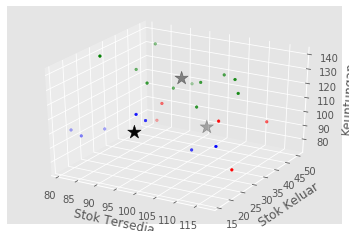

In [10]:
colors= ['r', 'g', 'b', 'y', 'c', 'm']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
result=[]
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        result.append(np.average(points[:,1]*points[:,2]/points[:,0]))
        print(result)
        ax.scatter(points[:, 0], points[:, 1],points[:, 2], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1],C[:, 2], marker='*', s=200, c='#050505')
ax.set_xlabel('Stok Tersedia')
ax.set_ylabel('Stok Keluar')
ax.set_zlabel('Keuntungan')

In [11]:
#Auto labeled k-means
produk1=[]
produk2=[]
produk3=[]
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        produk_cluster = np.array([produk[k] for k in range(len(produk)) if clusters[k] == i])
        if np.min(result)==np.average(points[:,1]*points[:,2]/points[:,0]):
            produk1=produk_cluster
        elif np.max(result)==np.average(points[:,1]*points[:,2]/points[:,0]):
            produk3=produk_cluster
        else:
            produk2=produk_cluster

In [12]:
print("produk1")
print(produk1)
print("produk2")
print(produk2)
print("produk3")
print(produk3)

produk1
['Habbatussauda Oil 200 Kapsul' 'Habasyi Oil 100 Kps'
 'Habasyi Oil 210 Kps' 'Habbatussauda Al-Afiat 200 Kps'
 'Propolis Melia Sehat / Botol' 'Madu for Mama Al Mabruroh'
 'Madu Hutan Sialang 1 Kg']
produk2
['Habbatussauda Al-Afiat 100 Kps' 'Habbatussauda Oil Al-Afiat 100 Kps'
 'Habbatussauda Oil Al-Afiat 60 Kps' 'Madu Batuk Al-Wadey'
 'Madu Hutan Liar Al Wadey 500 Gram']
produk3
['Habbatussauda Extra Propolis Trigon' 'Kapsul Habbatus Sauda'
 'Habat Oil 369' 'Habbatussauda Oil Al-Afiat 200 Kps'
 'Propolis Brazalian / Botol' 'Propolis Diamond Lite 20 / Botol'
 'Propolis Diamond Regular / Botol' 'Propolis Melia Nature / Botol'
 'Propolis Prosmart/ Botol' 'Madu Al-Kautsar' 'Madu Hitam Pahit 460 gram']


In [14]:
Bundle =[]
#jenis bundle 1 [0,1]
pro1=random.choice(produk1)
pro2=random.choice(produk1)
pro3=random.choice(produk1)
pro4=random.choice(produk1)
print(pro1," dan ",pro2)
print(pro3," dan ",pro4)
#jenis bundle 2 [2,3]
pro5=random.choice(produk1)
pro6=random.choice(produk3)
pro7=random.choice(produk1)
pro8=random.choice(produk3)
print(pro5," dan ",pro6)
print(pro7," dan ",pro8)

Habasyi Oil 100 Kps  dan  Madu Hutan Sialang 1 Kg
Madu Hutan Sialang 1 Kg  dan  Habbatussauda Al-Afiat 200 Kps
Habbatussauda Al-Afiat 200 Kps  dan  Propolis Brazalian / Botol
Habasyi Oil 210 Kps  dan  Madu Hitam Pahit 460 gram
